<a href="https://colab.research.google.com/github/ALXAVIER-DEV/Spark/blob/master/Aula_2_Transforma%C3%A7%C3%B5es_e_a%C3%A7%C3%B5es_com_Dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Running Pyspark in Colab**

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 3.0.1 with hadoop 2.7 and Java 8. The tools installation can be carried out inside the Jupyter Notebook of the Colab. One important note is that if you are new in Spark, it is better to avoid Spark 2.4.0 version since some people have already complained about its compatibility issue with python. 
Follow the steps to install the dependencies:

In [96]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark

Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:

In [97]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Run a local spark session to test your installation:

In [98]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [99]:
spark

# Reading a CSV from google drive

Utilizando o Google Colab, é possível importar os datasets diretamente do Google Drive, sem ter que realizar o upload manual dos mesmos para a instância colab manualmente

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
spark.read\
  .option("inferSchema", "true") \
  .option("header", "true") \
  .option("delimiter", ",") \
  .csv("/content/drive/My Drive/Spark_Treinamento/vgsales.csv") \
  .show()

+----+--------------------+--------+----+--------+------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|   Genre|   Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+--------+------------+--------+--------+--------+-----------+------------+
| 259|           Asteroids|    2600|1980| Shooter|       Atari|     4.0|    0.26|     0.0|       0.05|        4.31|
| 545|     Missile Command|    2600|1980| Shooter|       Atari|    2.56|    0.17|     0.0|       0.03|        2.76|
|1768|             Kaboom!|    2600|1980|    Misc|  Activision|    1.07|    0.07|     0.0|       0.01|        1.15|
|1971|            Defender|    2600|1980|    Misc|       Atari|    0.99|    0.05|     0.0|       0.01|        1.05|
|2671|              Boxing|    2600|1980|Fighting|  Activision|    0.72|    0.04|     0.0|       0.01|        0.77|
|4027|          Ice Hockey|    2600|1980|  Sports|  Activision|    0.46|

# Transformações e ações com Dataframes
Nessa aula, daremos passaremos sobre o que vem a ser transformação e ação. Veremos como esses conceitos são utilizados se tratando dos Dataframes e quais ações são possíveis de serem realizadas utilizando SparkSQL.

## Pré-requisitos:
Instalar as bibliotecas `pandas` e `matplotlib`:


In [109]:
!pip install pandas
!pip install matplotlib

## Carregando o dataset videogamesales


In [110]:
data_dir = "/content/drive/My Drive/Spark_Treinamento/vgsales.csv"

Usando a opção para inferir o schema dos dados automaticamente

In [111]:
df = spark.read.load(data_dir, format="csv", inferSchema="true", header="true")
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



In [112]:
df.show()

+----+--------------------+--------+----+--------+------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|   Genre|   Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+--------+------------+--------+--------+--------+-----------+------------+
| 259|           Asteroids|    2600|1980| Shooter|       Atari|     4.0|    0.26|     0.0|       0.05|        4.31|
| 545|     Missile Command|    2600|1980| Shooter|       Atari|    2.56|    0.17|     0.0|       0.03|        2.76|
|1768|             Kaboom!|    2600|1980|    Misc|  Activision|    1.07|    0.07|     0.0|       0.01|        1.15|
|1971|            Defender|    2600|1980|    Misc|       Atari|    0.99|    0.05|     0.0|       0.01|        1.05|
|2671|              Boxing|    2600|1980|Fighting|  Activision|    0.72|    0.04|     0.0|       0.01|        0.77|
|4027|          Ice Hockey|    2600|1980|  Sports|  Activision|    0.46|

Visualizar o dataset de uma forma mais amigável

In [113]:
df.toPandas().head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


## Definindo um método para plotar Dataframes Spark

In [114]:
def display_df(df, n=20):
    return df.limit(n).toPandas()

## Descrevendo estatisticamente o Dataframe

In [115]:
display_df(df.describe(), 10)

,summary,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,count,16324,16324,16324,16324,16324,16324,16324,16324,16324,16324,16324
1,mean,8291.508270031854,1942.0,2600.0,2006.4042514089683,None,None,0.26546373437883625,0.14758147512864267,0.07867250673853998,0.048334354324916624,0.5403277382994689
2,stddev,4792.04373419048,NaN,0.0,5.826744311455716,None,None,0.8216584668393672,0.5088085165507903,0.3115844508522971,0.18990174560162928,1.5658596703325407
3,min,1,'98 Koshien,2600,1980,Action,10TACLE Studios,0.0,0.0,0.0,0.0,0.01
4,max,16600,¡Shin Chan Flipa en colores!,XOne,2016,Strategy,responDESIGN,41.49,29.02,10.22,10.57,82.74


# Análise exploratória dos dados
Vamos aqui realizar uma série de queries sobre os dados utilizando as APIs para Spark em Python (Pyspark) e o framework SparkSQL. Para isso, seguem algumas perguntas analiticas.

### Quais foram os top 10 jogos mais vendidos até os anos 2000?
**Pyspark API**

In [118]:
import pyspark.sql.functions as f

# df -> T1 -> df2
# df2 -> T2 -> df3
# df3 -> T3 -> df4
# df4 -> T4 -> df5
# df5 -> A1

sales_2000 = df.select("Name", "Global_Sales", "Year") \
    .filter(f.col("Year") <= 2000) \
    .orderBy(f.desc("Global_Sales")) \
    .limit(10)

display_df(sales_2000) 

,Name,Global_Sales,Year
0,Super Mario Bros.,40.24,1985
1,Pokemon Red/Pokemon Blue,31.37,1996
2,Tetris,30.26,1989
3,Duck Hunt,28.31,1984
4,Pokemon Gold/Pokemon Silver,23.10,1999
5,Super Mario World,20.61,1990
6,Super Mario Land,18.14,1989
7,Super Mario Bros. 3,17.28,1988
8,Pokémon Yellow: Special Pikachu Edition,14.64,1998
9,Super Mario 64,11.89,1996


**Spark SQL**

In [119]:
df.createOrReplaceTempView("videogame_sales")

sales_2000 = spark.sql("""
    SELECT 
      Name, 
      Global_Sales
    FROM videogame_sales
    WHERE Year <= 2000
    ORDER BY Global_Sales DESC
    LIMIT 10
""")

display_df(sales_2000)

,Name,Global_Sales
0,Super Mario Bros.,40.24
1,Pokemon Red/Pokemon Blue,31.37
2,Tetris,30.26
3,Duck Hunt,28.31
4,Pokemon Gold/Pokemon Silver,23.10
5,Super Mario World,20.61
6,Super Mario Land,18.14
7,Super Mario Bros. 3,17.28
8,Pokémon Yellow: Special Pikachu Edition,14.64
9,Super Mario 64,11.89


### Qual foi o total de vendas em NA e Global por Platform no ano de 2005?
**Pyspark API**

In [120]:
df.select("Platform", "Global_Sales") \
    .filter(f.col("Year") == 2005) \
    .groupBy("Platform") \
    .sum("Global_Sales")

DataFrame[Platform: string, sum(Global_Sales): double]

In [121]:
import pyspark.sql.functions as f

# df -> T1 -> df2
# df2 -> T2 -> df3
# df3 -> T3 (group by + agg) -> df4
# df4 -> T4 -> df5
# df5 -> A1

sales_publisher_2005 = df.select("Platform", "Global_Sales", "NA_Sales") \
    .filter(f.col("Year") == 2005) \
    .groupBy("Platform") \
    .agg(
        f.sum("Global_sales").alias("Global_sales_Total"), 
        f.sum("NA_Sales").alias("NA_Sales_Total")
    ) \
    .orderBy(f.desc("Global_sales_Total"))

display_df(sales_publisher_2005)

,Platform,Global_sales_Total,NA_Sales_Total
0,PS2,160.65,85.60
1,DS,131.40,48.47
2,XB,49.17,34.84
3,PSP,44.23,24.48
4,GBA,33.90,21.70
5,GC,27.80,19.25
6,X360,8.32,6.89
7,PC,4.47,1.38


**Spark SQL**

In [122]:

df.createOrReplaceTempView("videogame_sales")

sales_publisher_2005 = spark.sql("""
    SELECT Platform, 
        SUM(Global_Sales) AS Global_sales_Total, 
        SUM(NA_Sales) AS NA_Sales_Total
    FROM videogame_sales
    WHERE Year = 2005
    GROUP BY Platform
    ORDER BY Global_sales_Total DESC
""")

display_df(sales_publisher_2005)

,Platform,Global_sales_Total,NA_Sales_Total
0,PS2,160.65,85.60
1,DS,131.40,48.47
2,XB,49.17,34.84
3,PSP,44.23,24.48
4,GBA,33.90,21.70
5,GC,27.80,19.25
6,X360,8.32,6.89
7,PC,4.47,1.38


### Qual foi a evolução das arrecadações globais das plataformas PS2, PS3 e X360 ao longo dos anos?

O objetivo aqui é exibir um gráfico de linha com a evolução das arrecadações nas plataformas ao longo do tempo. Utilizaremos a API Pyspark para realizar essa plotagem



In [123]:
import pyspark.sql.functions as f

timeline_sales = df.select("Platform", "Global_Sales", "Year") \
    .where("Platform in ('PS2', 'PS3', 'X360')") \
    .groupBy("Year", "Platform") \
    .agg(
        f.sum("Global_sales").alias("Global_sales_Total")
    ) \
    .orderBy(f.asc("Year"))

display_df(timeline_sales)

,Year,Platform,Global_sales_Total
0,2000,PS2,39.11
1,2001,PS2,166.43
2,2002,PS2,205.11
3,2003,PS2,184.29
4,2004,PS2,211.78
5,2005,PS2,160.65
6,2005,X360,8.32
7,2006,X360,51.88
8,2006,PS2,103.42
9,2006,PS3,21.07


Plotando a série temporal das vendas das plataformas (pivoteamento necessário)

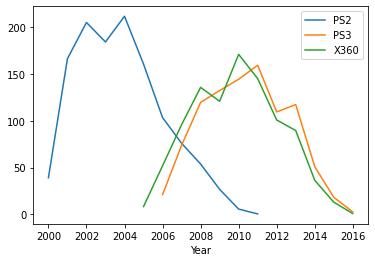

In [124]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt

%matplotlib inline

timeline_sales_pivot = timeline_sales \
    .groupBy("Year")\
    .pivot("Platform")\
    .agg(f.sum("Global_sales_Total"))

#display_df(timeline_sales_pivot)

timeline_sales_pivot.toPandas()\
   .set_index("Year").plot()

# Exercícios - pt1

1)  Utilizando a API em Python do Spark (PySpark) retorne um novo dataframe contendo duas colunas: o nome do console (coluna Platform) e a contagem de jogos em cada plataforma no ano de 2010, ordenado pela contagem decrescentemente:

In [125]:
import pyspark.sql.functions as f

# df -> T1 -> df2
# df2 -> T2 -> df3
# df3 -> T3 -> df4
# df4 -> T4 -> df5
# df5 -> A1

consoles_2010 = df.select("Platform", "Name", "Year") \
  .filte(f.col("Year") == 2010) \
  .groupBy("Platform") \
  .agg(f.count("Name").alias("Jogos"))   
  .orderBy(f.desc("Platform"))
 
display_df(consoles_2010) 

IndentationError: ignored

2)  Utilizando SQL, retorne o total arrecadado (coluna Global_Sales) por produtora (coluna Publisher) entre os anos 2000 e 2010 ordenado decrescentemente pelo total arrecadado

In [94]:
df.createOrReplaceTempView("videogame_sales")

sales_publisher_2005 = spark.sql("""
    SELECT Platform, 
        SUM(Global_Sales) AS Global_sales_Total, 
        SUM(NA_Sales) AS NA_Sales_Total
    FROM videogame_sales
    WHERE Year = 2005
    GROUP BY Platform
    ORDER BY Global_sales_Total DESC
""")

display_df(sales_publisher_2005)

,Platform,Global_sales_Total,NA_Sales_Total
0,PS2,160.65,85.60
1,DS,131.40,48.47
2,XB,49.17,34.84
3,PSP,44.23,24.48
4,GBA,33.90,21.70
5,GC,27.80,19.25
6,X360,8.32,6.89
7,PC,4.47,1.38


3) Utilizando a API em Python do Spark (PySpark), escreva uma sequência de transformações que retorne um dataframe contendo o total das vendas Global_Sales por Publisher em cada ano compreendido entre 2000 e 2010:

In [95]:
import pyspark.sql.functions as f

df4 = df.select("Publisher", "Year", "Global_Sales")\
  .filter((f.col("Year")>= 2000)&(f.col("Year") <=2010))\
  .groupBy("Pulisher")\
  .pivot("Year")\
  .agg(f.sum("Global_Sales"))\
  .na.fill(0)

display_df(df4)

AnalysisException: ignored

# Spark UDFs

UDF ou User Defined Functions são funções específicas definidas pelo usuário e disponíveis para uso em tempo de execução. Nelas, o usuário pode definir um comportamento aplicável a todo parâmetro passado a ela

## UDF simples
Aqui faremos a definição das nossas UDFs de dois modos. O primeiro é para ser utilizado com a API do Spark para Python. Já a segunda estará disponível para uso dentro do SparkSQL

In [ ]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import udf

# Função Python para ser utilizada nos dataframes
def tax_collected(value):
    return value*0.1

# Conversão da função em  UDF para uso em Pyspark API
tax_collected_udf = udf(tax_collected, DoubleType())

# Conversão da função em  UDF para uso em SparkSQL
spark.udf.register("tax_collected_udf_sql", tax_collected, DoubleType())

**Spark SQL**

In [ ]:
display_df(spark.sql("""
    SELECT Platform, 
    NA_Sales,
    tax_collected_udf_sql(NA_Sales) as tax_collected
    FROM videogame_sales
    LIMIT 10    
"""))

**Pyspark API**

In [ ]:
display_df(
    df.select("Platform", "NA_Sales", tax_collected_udf("NA_Sales").alias("tax_collected")) \
    .limit(10)
)


## UDF com objetos externos
É possível criar UDFs com objetos Python, de modo que possam ser usados de forma paralela pelo cluster de Spark

In [ ]:
import hashlib
from pyspark.sql.types import StringType

def generate_hash(value):
    hash_object = hashlib.md5(bytes(value, 'utf8'))
    return hash_object.hexdigest()

# Uso em SparkSQL
spark.udf.register("generate_hash_sql", generate_hash, StringType())

In [ ]:
display_df(spark.sql("""
    SELECT Platform, 
    generate_hash_sql(Platform) as Platform_handle
    FROM videogame_sales
    LIMIT 10
"""))

# Joins entre Dataframes Spark
Frequentemente, ao lidar com analise de dados utilizando o Spark ou na criação de pipelines de transformação de dados, é comum realizar a junção de diferentes bases de dados de forma a ter o dado o mais completo o possível disponível para o cientista de dados. Esse conceito é contrário ao conceito de "Normalização" nos tradicionais bancos de dados, conhecido como "Desnormalização".

**Preparando os datasets**

In [ ]:
values_a = [('Pirate',1),('Monkey',2),('Ninja',3),('Spaghetti',4)]
table_a = spark.createDataFrame(values_a,['name','id'])
 
values_b = [('Rutabaga',1),('Pirate',2),('Ninja',3),('Darth Vader',4)]
table_b = spark.createDataFrame(values_b,['name','id'])

display_df(table_a)
#display_df(table_b)

**Inner Join**

In [ ]:
inner_join = table_a.join(table_b, table_a.name == table_b.name)
display_df(inner_join)

**Left Join**

In [ ]:
left_join = table_a.join(table_b, table_a.name == table_b.name, how="left") # também pode ser usado o 'left_outer'
display_df(left_join)

**Right Join**

In [ ]:
right_join = table_a.join(table_b, table_a.name == table_b.name, how="right") # também pode ser usado o 'right_outer'
display_df(right_join)

**Full Join**

In [ ]:
full_join = table_a.join(table_b, table_a.name == table_b.name, how="full") # também pode ser usado o 'full_outer'
display_df(full_join)

**Cross join ou produto cartesiano**

In [ ]:
cross_join = table_a.crossJoin(table_b.select("name"))
display_df(cross_join)

# Exercícios - pt2

4) Utilizando o dataset vgsales, crie uma UDF que cálcule o século em que o jogo foi lançado:

In [151]:

    

from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf
 
# Função Python para ser utilizada nos dataframes
def get_seculus(value):
  last_first_two_digits = value[0:2] 
    if value[1:3] == "00":
        return int(last_first_two_digits)
    else:
        return int(last_first_two_digits) + 1
 
# Conversão da função em  UDF para uso em Pyspark API
get_seculus_udf = udf(get_seculus, IntegerType())
 
df.select(get_seculus_udf("year").alias("seculus"), "year").show()




# df = ...

IndentationError: ignored

5) Utilizando os datasets do código abaixo:

In [137]:
employees = [('Joao',1),('Marcos',2),('Tiago',3),('Pedro',4), ('Maria',5), ('Marta',6)]
employees_df = spark.createDataFrame(employees,['name','id'])
 
deptos = [('Administrativo',1),('Financeiro',2),('Financeiro',3),('Financeiro',5),('TI',5),('TI',6)]
deptos_df = spark.createDataFrame(deptos,['dep_name','emp_id'])

Retorne a lista de empregados (employees) e a lista de departamentos (deptos), retorne uma lista de todos os empregados que estão em um departamento:

In [138]:
employees_df.join(deptos_df, employees_df.id == deptos_df.emp_id).show()

+------+---+--------------+------+
|  name| id|      dep_name|emp_id|
+------+---+--------------+------+
| Marta|  6|            TI|     6|
| Maria|  5|    Financeiro|     5|
| Maria|  5|            TI|     5|
|  Joao|  1|Administrativo|     1|
| Tiago|  3|    Financeiro|     3|
|Marcos|  2|    Financeiro|     2|
+------+---+--------------+------+

